### TAREFA

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
url = 'C:/Users/jader.greiner/Documents/Jader/Mentorama/M5/titanic.csv'
df = pd.read_csv(url)

#df.head()

#probabilidade de sobreviver geral:

print("Probabilidade de sobreviver geral: \n",round(df.Survived.value_counts()/df.Survived.shape[0],2))

# A: sobreviver
# B: ser homem/mulher

prob_h = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]
prob_m = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

print("Probabilidade de sobreviver sendo homem:", round(prob_h,2))
print("Probabilidade de sobreviver sendo mulher:", round(prob_m,2))

Probabilidade de sobreviver geral: 
 0    0.62
1    0.38
Name: Survived, dtype: float64
Probabilidade de sobreviver sendo homem: 0.19
Probabilidade de sobreviver sendo mulher: 0.74


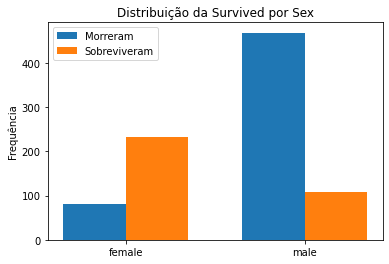

In [3]:
# Frequência de sobrevivência por sexo

df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

labels = list(df_sex.index) #labels do gráfico de barras

morreram = df_sex[0].values #valores para construção do grafico de barras
sobreviveram = df_sex[1].values #valores para construção do grafico de barras

morreram_pct = df_sex_pct[0].values #valores para construção do grafico de barras
sobreviveram_pct= df_sex_pct[1].values #valores para construção do grafico de barras


x = np.arange(len(labels))  #localização dos labels
width = 0.35  # largura das barras

fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Survived por Sex') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #legenda do gráfico
plt.show()

### calculando chi-quadrado

In [4]:
# Distribuição geral da variável survived

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [5]:
 # Vamos escrever a tabela de frequencia para os dados observados.

#OBSERVADO:

# Tabela de frequência absoluta -- será usado para o cálculo do chi-quadrado
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()


# Estamos calculando os valores, considerando o total pelas linhas, ou seja, pela variável Pclass
df_sex_pct = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_pct

#Interpretação: 74% de todas as mulheres sobreviveram contra 38% do geral

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [6]:
#tabela de frequência criada acima com os totais em valor absoluto

df_sex['total'] = df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [7]:
# Vamos agora calcular a tabela de frequência esperada, caso as duas variáveis não tivesse relação.
# Se esse fosse o caso, esperaríamos ter 62% de 0 e 38% de 1 mde cada sexo

#ESPERADO:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [8]:
# Cálculo do chi-quadrado

# Observado menos o esperado: o_i - e_i == desvio
desvios = (df_sex.iloc[:,:2].values - df_esp.values)
print(desvios)

#(o_i - e_i)^2
desvios_ao_quadaro = desvios**2

#(o_i - e_i)^2 / e_i

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad, "indicando uma 'boa' relação entre as variáveis!")

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303 indicando uma 'boa' relação entre as variáveis!


# :

Ex3: Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [10]:
import pandas as pd

df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
Name: UF, dtype: int64


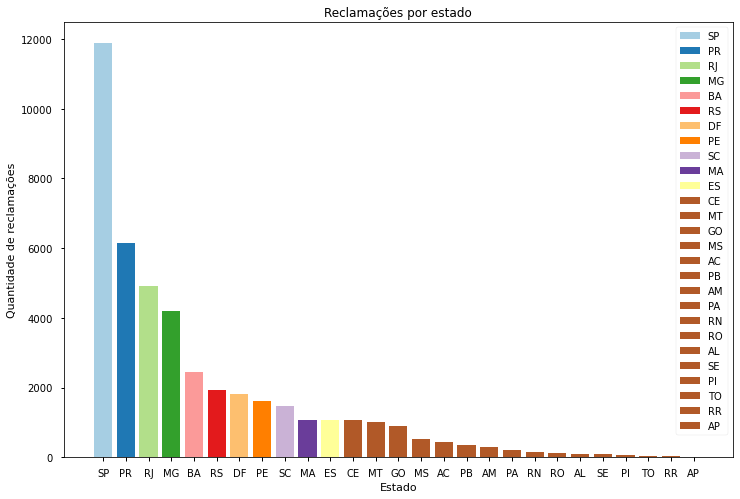

In [21]:
# 1 - Qual o número de reclamações por Estado?
print(df.UF.value_counts())

# frequência de reclamações por estado

plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (12,8)

dados = df['UF'].value_counts().tolist()
legenda = df['UF'].value_counts().keys().tolist()

quantidade_cores=27
color_lista=plt.cm.Paired(np.arange(quantidade_cores))

bars = plt.bar(legenda,dados, label='Estado', color=color_lista)

plt.title('Reclamações por estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de reclamações')
plt.legend(bars,legenda)
plt.show()

M    27895
F    16092
Name: Sexo, dtype: int64


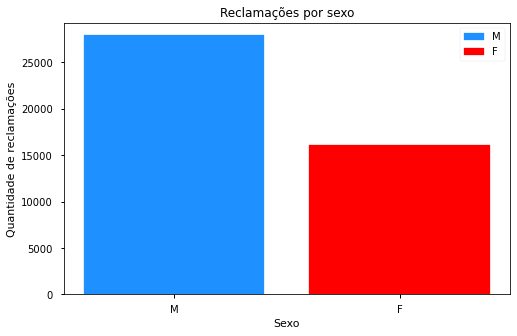

In [22]:
# 2 - Qual a quantidade de reclamações por sexo?
print(df.Sexo.value_counts())

dados = df['Sexo'].value_counts().tolist()
legenda = df['Sexo'].value_counts().keys().tolist()

plt.rcParams['figure.figsize'] = (8,5)

bars = plt.bar(legenda,dados, label='Sexo')
bars[0].set_color('dodgerblue')
bars[1].set_color('red')
plt.legend(bars,legenda)
plt.title('Reclamações por sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de reclamações')
plt.show()

In [15]:
# 3 - O tempo de resposta tem alguma correlação com a nota do consumidor?
df2=df.corr(method='pearson')
df2.style.background_gradient(cmap='coolwarm')

#print("Não foi evidenciado correlação")

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
Ano Abertura,nan,nan,nan,nan,nan,nan
Mês Abertura,nan,1.000000,0.194573,-0.035776,0.073964,nan
Prazo Analise Gestor,nan,0.194573,1.000000,0.082552,-0.068360,nan
Tempo Resposta,nan,-0.035776,0.082552,1.000000,-0.187150,nan
Nota do Consumidor,nan,0.073964,-0.068360,-0.187150,1.000000,nan
Total,nan,nan,nan,nan,nan,nan


In [16]:
print("Não foi evidenciado correlação")

Não foi evidenciado correlação


S    0.953941
N    0.046059
Name: Respondida, dtype: float64
As reclamação não respondidas correspondem a 4,60%


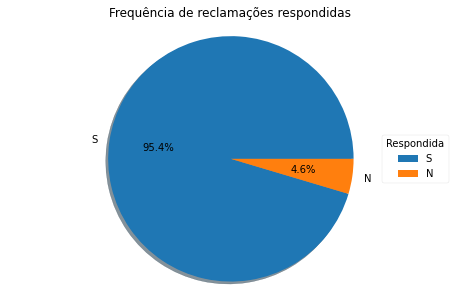

In [23]:
# 4 - Proporção de reclamações registradas e não respondidas.
print(df.Respondida.value_counts('N'))
print('As reclamação não respondidas correspondem a 4,60%')

dados = df.Respondida.value_counts('N')
legenda = df['Respondida'].value_counts().keys().tolist()

# criando a representação, área de plotagem
fig1, ax1 = plt.subplots()

# criando o gráfico
ax1.pie(dados, labels=legenda, shadow=True, autopct='%1.1f%%')

# gráfico em círculo
ax1.axis('equal')

# Título do gráfico
ax1.set_title("Frequência de reclamações respondidas")

# Definindo a legenda e localização
ax1.legend(legenda,title="Respondida",loc="center right")
          
plt.show()

### 5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. Importante: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

##### Explorei no exercício as reclamações por grupo de idades. Primeira análise que fiz foi separando as reclamações por faixa etária e mostrando isso num gráfico de barras.

#### A segunda análise quis explorar os dados individuais de cada grupo, achei interessante o comportamento diferente nas notas de grupos diferentes e mostrei em gráficos. 

### No grupo entre 31 a 40 anos, 45,30% das pessoas responderam notas entre 4 e 5. 
### No grupo entre 61 a 70 este número cai para 42,5%. As notas de valor 1 também aumentaram no grupo de 61 a 70 anos.

#### Cabe uma análise mais aprofundada das motivações no comportamento dos clientes.

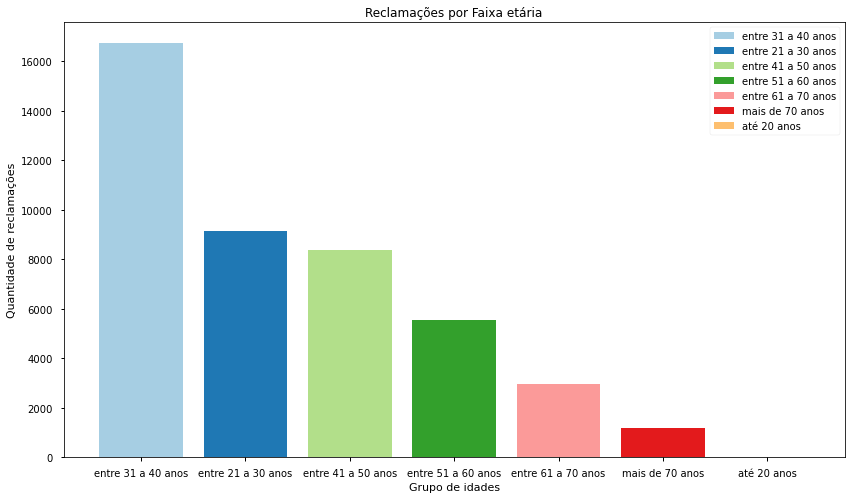

<ipython-input-24-18772ef4963e>:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.grupo1 = df.loc[df['Faixa Etária'] == 'entre 31 a 40 anos']
<ipython-input-24-18772ef4963e>:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.grupo2 = df.loc[df['Faixa Etária'] == 'entre 61 a 70 anos']


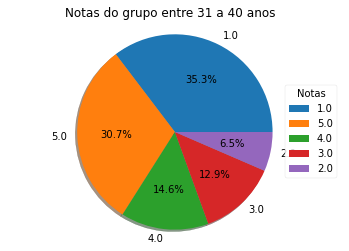

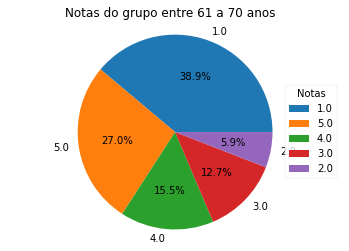

In [24]:
# frequência de reclamações por faixa etária

## gerando o gráfico de barras geral 

plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14,8)

dados = df['Faixa Etária'].value_counts().tolist()
legenda = df['Faixa Etária'].value_counts().keys().tolist()

quantidade_cores=27
color_lista=plt.cm.Paired(np.arange(quantidade_cores))

bars = plt.bar(legenda,dados, label='Estado', color=color_lista)

plt.title('Reclamações por Faixa etária')
plt.xlabel('Grupo de idades')
plt.ylabel('Quantidade de reclamações')
plt.legend(bars,legenda)
plt.show()

## criando os DataFrames de cada grupo

df.grupo1 = df.loc[df['Faixa Etária'] == 'entre 31 a 40 anos']
df.grupo2 = df.loc[df['Faixa Etária'] == 'entre 61 a 70 anos']

## parâmetro para gerar os gráficos pizza menores
plt.rcParams['figure.figsize'] = (6,4)

dados = df.grupo1['Nota do Consumidor'].value_counts('N')
legenda = df.grupo1['Nota do Consumidor'].value_counts().keys().tolist()

# criando a representação, área de plotagem
fig1, ax1 = plt.subplots()

# criando o gráfico
ax1.pie(dados, labels=legenda, shadow=True, autopct='%1.1f%%')

# gráfico em círculo
ax1.axis('equal')

# Título do gráfico
ax1.set_title("Notas do grupo entre 31 a 40 anos  ")

# Definindo a legenda e localização
ax1.legend(legenda,title="Notas",loc="center right")
          
plt.show()

####### segunda parte dos gráficos ################## 

dados = df.grupo2['Nota do Consumidor'].value_counts('N')
legenda = df.grupo2['Nota do Consumidor'].value_counts().keys().tolist()

# criando a representação, área de plotagem
fig1, ax2 = plt.subplots()

# criando o gráfico
ax2.pie(dados, labels=legenda, shadow=False, autopct='%1.1f%%', normalize=False)

# gráfico em círculo
ax2.axis('equal')

# Título do gráfico
ax2.set_title("Notas do grupo entre 61 a 70 anos  ")

# Definindo a legenda e localização
ax2.legend(legenda,title="Notas",loc="center right")
          
plt.show()